# 上市公司财务指标可视化分析


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体和负号正常显示
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False


## 任务一

绘制“净利润”、“营业总收入”、“营业利润”、“利润总额”随时间变化的多线图，并显示图例。


,股票代码,股票简称,报告期,年,季度,净利润,营业总收入,营业利润,利润总额,净利润同比,营业总收入同比
0,600519,贵州茅台,2021-03-31,2021,1,1.395446e+10,2.806474e+10,1.971406e+10,1.969488e+10,6.57,10.934421
1,600519,贵州茅台,2021-06-30,2021,2,2.465399e+10,5.072158e+10,3.507177e+10,3.505100e+10,9.08,11.147763
2,600519,贵州茅台,2021-09-30,2021,3,3.726617e+10,7.705315e+10,5.302296e+10,5.285609e+10,10.17,10.748532
3,600519,贵州茅台,2021-12-31,2021,4,5.246014e+10,1.094643e+11,7.475088e+10,7.452803e+10,12.34,11.705948
4,600519,贵州茅台,2022-03-31,2022,1,1.724497e+10,3.318716e+10,2.402687e+10,2.401112e+10,23.58,18.252174
5,600519,贵州茅台,2022-06-30,2022,2,2.979391e+10,5.944352e+10,4.163479e+10,4.163992e+10,20.85,17.195709
6,600519,贵州茅台,2022-09-30,2022,3,4.439982e+10,8.978588e+10,6.196155e+10,6.191642e+10,19.14,16.524600
7,600519,贵州茅台,2022-12-31,2022,4,6.271747e+10,1.275540e+11,8.787952e+10,8.770149e+10,19.55,16.525647
8,600519,贵州茅台,2023-03-31,2023,1,2.079488e+10,3.937930e+10,2.868589e+10,2.870014e+10,20.59,18.658245
9,600519,贵州茅台,2023-06-30,2023,2,3.598042e+10,7.098721e+10,4.989175e+10,4.992398e+10,20.76,19.419590


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   股票代码     12 non-null     int64         
 1   股票简称     12 non-null     object        
 2   报告期      12 non-null     datetime64[ns]
 3   年        12 non-null     int64         
 4   季度       12 non-null     int64         
 5   净利润      12 non-null     float64       
 6   营业总收入    12 non-null     float64       
 7   营业利润     12 non-null     float64       
 8   利润总额     12 non-null     float64       
 9   净利润同比    12 non-null     float64       
 10  营业总收入同比  12 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 1.2+ KB


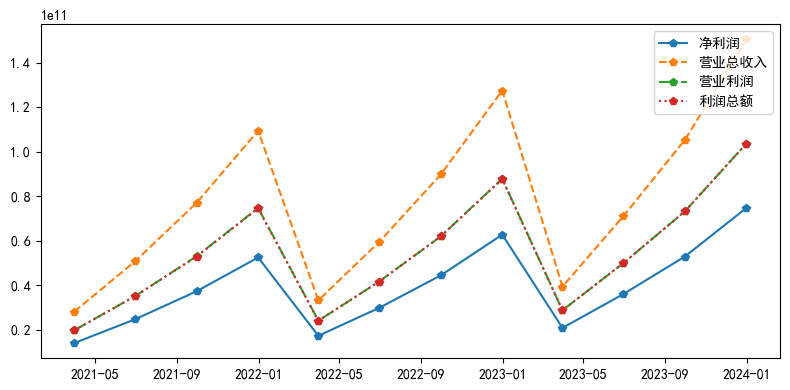

In [2]:
data = pd.read_excel("贵州茅台2021—2023年季度利润表.xlsx")
display(data)
data.info()
plt.figure(figsize=(8, 4))

cols = ["净利润", "营业总收入", "营业利润", "利润总额"]
linestyles = ["-", "--", "-.", ":"]

for col, ls in zip(cols, linestyles):
    plt.plot(data["报告期"], data[col], marker="p", linestyle=ls, label=col)

plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


## 任务二

创建 1 行 3 列的子图，绘制一组反映该公司 2021—2023 年的季度净利润同比增长率和营业总收入同比增长率变化的图表。


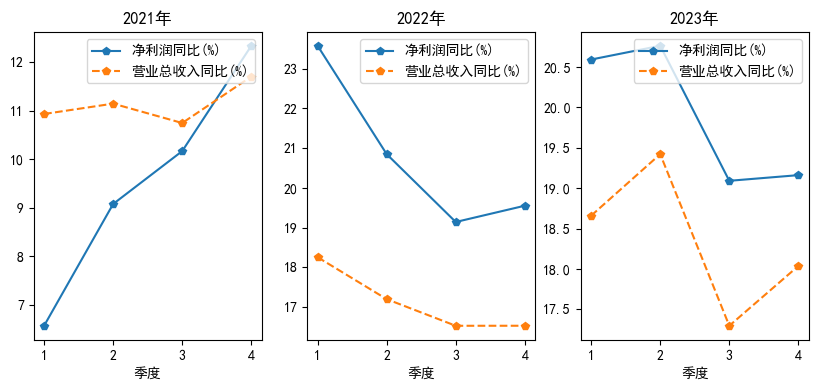

In [3]:
# 定义年份并遍历
years = [2021, 2022, 2023]
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
for i, year in enumerate(years):
    # 筛选特定年份的数据
    year_data = data[data["年"] == year]
    axs[i].plot(year_data["季度"], year_data["净利润同比"], marker="p", linestyle="-")
    axs[i].plot(
        year_data["季度"], year_data["营业总收入同比"], marker="p", linestyle="--"
    )
    axs[i].set_title(str(year) + "年")
    axs[i].set_xlabel("季度")
    axs[i].legend(["净利润同比(%)", "营业总收入同比(%)"], loc="upper right")
plt.show()

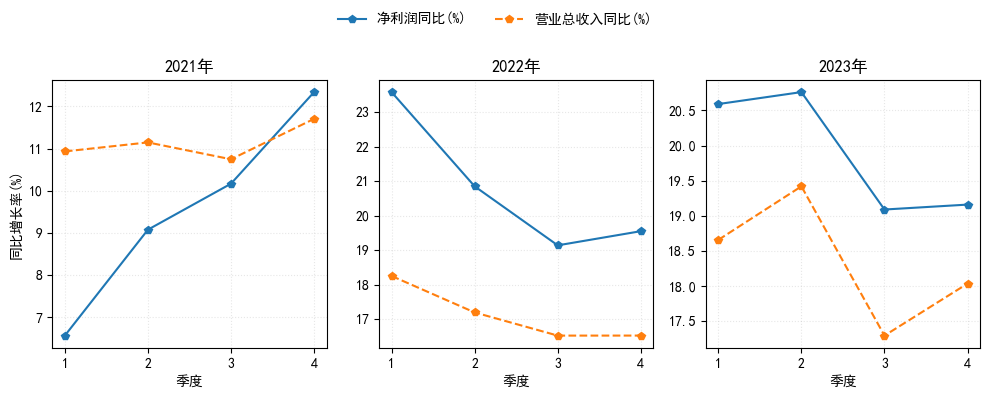

In [4]:
years = [2021, 2022, 2023]
metrics = [("净利润同比", "-"), ("营业总收入同比", "--")]

# fig, axs = plt.subplots(1, len(years), figsize=(10, 4), sharey=True)
fig, axs = plt.subplots(1, len(years), figsize=(10, 4))

for ax, y in zip(axs, years):
    yd = data.query("年 == @y").sort_values("季度")
    for m, ls in metrics:
        ax.plot(yd["季度"], yd[m], marker="p", linestyle=ls, label=f"{m}(%)")
    ax.set(title=f"{y}年", xlabel="季度")
    ax.set_xticks([1, 2, 3, 4])
    ax.grid(alpha=0.3, linestyle=":")

axs[0].set_ylabel("同比增长率(%)")

# 只放一份图例（更简洁）
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False)

fig.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


## 任务三

绘制“营业总收入”、“净利润”、“营业利润”、“利润总额”的散点矩阵图。


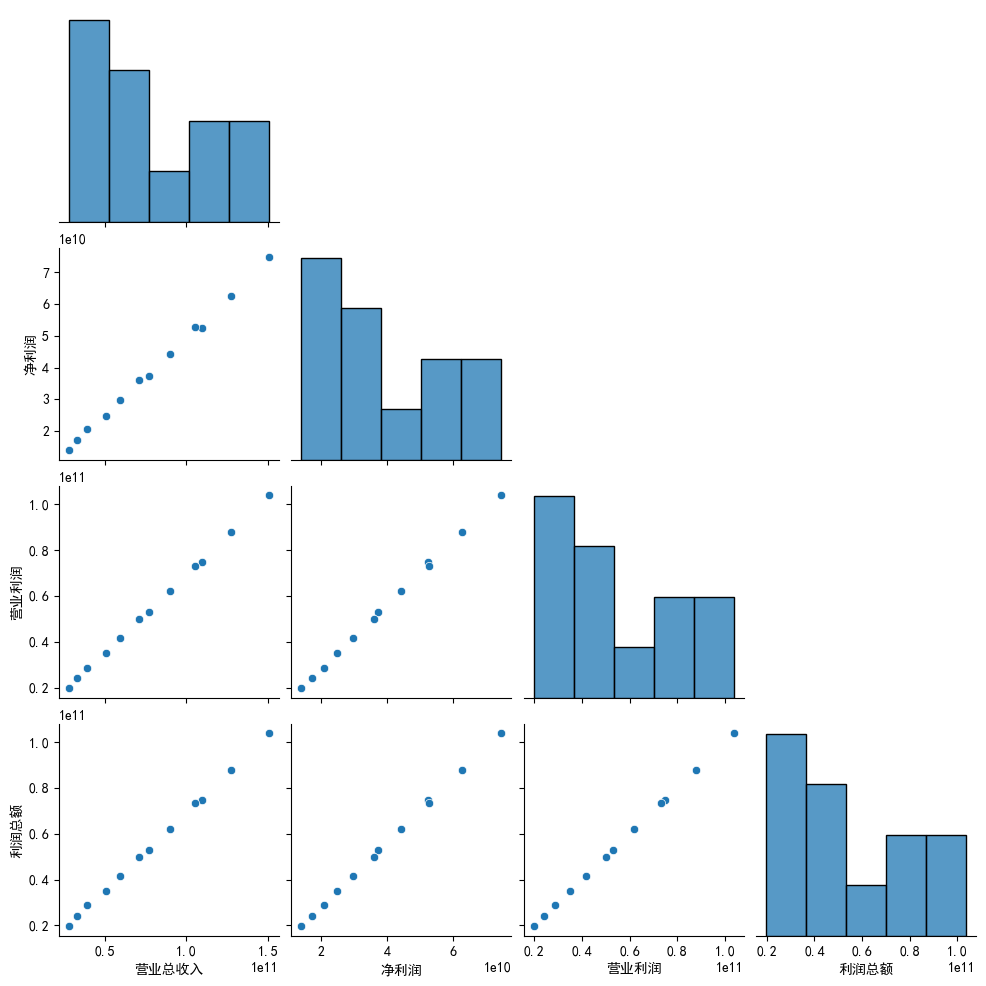

In [ ]:
import seaborn as sns

# corner 参数的作用是只显示下三角
sns.pairplot(data=data[["营业总收入", "净利润", "营业利润", "利润总额"]], corner=True)
plt.show()

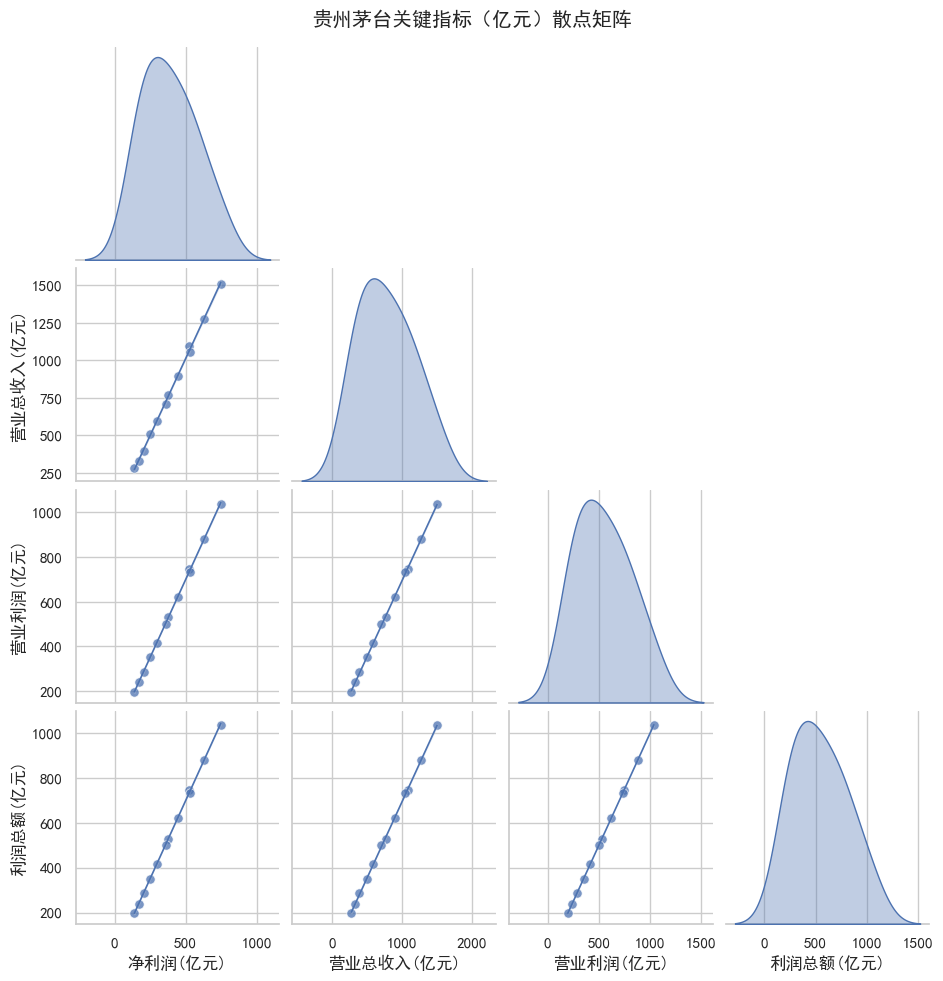

In [10]:
# 美化：统一主题、转成“亿元”避免坐标太大、加回归线/透明度、只画下三角
sns.set_theme(
    style="whitegrid",
    rc={
        "font.sans-serif": [
            "SimHei",
        ],
        "axes.unicode_minus": False,
    },
)

df_plot = data[cols].copy() / 1e8
df_plot.columns = [f"{c}(亿元)" for c in cols]

g = sns.pairplot(
    df_plot,
    kind="reg",
    diag_kind="kde",
    corner=True,
    height=2.4,
    # kind="reg" 底层用的是 sns.regplot；散点参数要放到 scatter_kws 里
    plot_kws=dict(
        scatter_kws=dict(s=45, alpha=0.75, edgecolor="white", linewidths=0.6),
        line_kws=dict(linewidth=1.2),
    ),
    diag_kws=dict(fill=True, alpha=0.35),
)

g.fig.suptitle("贵州茅台关键指标（亿元）散点矩阵", y=1.02)
plt.show()


## 任务四

绘制“营业总收入”、“净利润”、“营业利润”、“利润总额”的相关系数热力图。


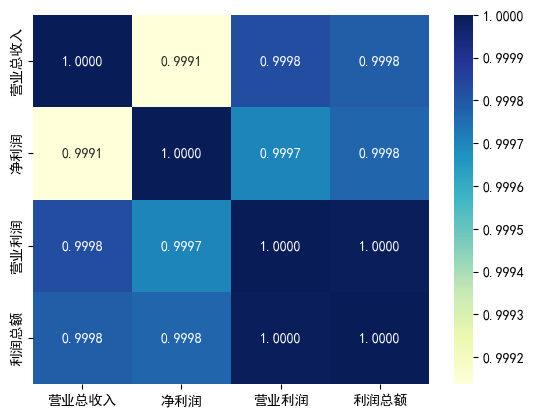

In [10]:
cor = data[["营业总收入", "净利润", "营业利润", "利润总额"]].corr()
sns.heatmap(
    cor,  # 相关系数
    cmap="YlGnBu",  # 用于指定颜色映射
    annot=True,
    fmt=".4f",
)  # annot表示热力图上是否显示数据；结果保留4位小数
plt.show()

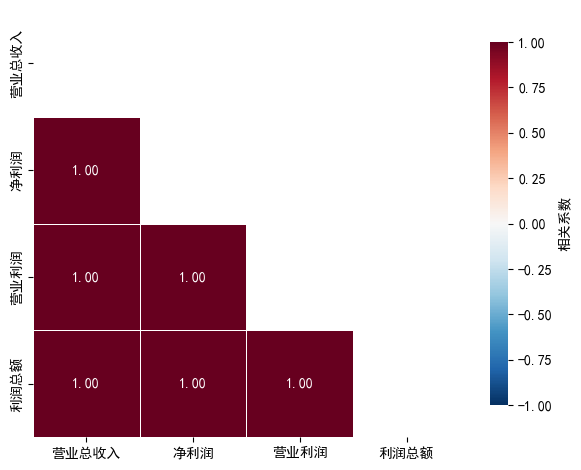

In [19]:
cor = data[["营业总收入", "净利润", "营业利润", "利润总额"]].corr()

# 只显示下三角，避免信息重复
mask = np.triu(np.ones_like(cor, dtype=bool))

sns.heatmap(
    cor,  # 相关系数
    mask=mask,
    cmap="RdBu_r",  # 发散色带：正相关偏红，负相关偏蓝
    vmin=-1,
    vmax=1,
    # center=0,  # 固定范围，便于不同图之间比较
    annot=True,
    fmt=".2f",
    square=True,  # 方格更规整
    linewidths=0.6,  # 方格线宽
    linecolor="white",  # 方格线色
    cbar_kws={"shrink": 0.85, "label": "相关系数"},  # 显示
)  # annot表示热力图上是否显示数据；结果保留4位小数

ax.set_title("关键财务指标相关系数热力图", pad=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()


`cbar_kws` 是 **seaborn 里传给颜色条（colorbar）的参数字典**，常用在 `sns.heatmap()` 这种会生成颜色条的图里。

- 作用：用来控制右侧（或下方）颜色条的样式/行为，比如大小、标签、刻度等
- 你当前代码里：`cbar_kws={"shrink": 0.85, "label": "相关系数"}` 表示
  - `shrink=0.85`：把颜色条长度缩短到原来的 85%（看起来更紧凑）
  - `label="相关系数"`：给颜色条加一个标题文字

常见还能这样用（举例）：


In [ ]:
sns.heatmap(cor, cbar_kws={"orientation": "horizontal"})  # 横向颜色条
sns.heatmap(cor, cbar_kws={"ticks": [-1, -0.5, 0, 0.5, 1]})  # 自定义刻度
sns.heatmap(cor, cbar_kws={"pad": 0.02})  # 调整颜色条与图的间距

In [ ]:
data = pd.read_excel("贵州茅台2021-2023年季度资产负债表.xlsx")
plt.plot(data["报告期"], data["资产-总资产"], marker="p", linestyle="-")
plt.plot(data["报告期"], data["负债-总负债"], marker="p", linestyle="--")
plt.legend(["资产-总资产", "负债-总负债"], loc="upper left")
plt.show()

In [ ]:
# 定义年份并遍历
years = [2021, 2022, 2023]
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
for i, year in enumerate(years):
    # 筛选特定年份的数据
    year_data = data[data["年"] == year]
    axs[i].bar(year_data["季度"], year_data["资产负债率"])
    axs[i].set_title(str(year) + "年资产负债率(%)")
    axs[i].set_xlabel("季度")
plt.show()

In [ ]:
data["资产-货币资金占比"] = data["资产-货币资金"] / data["资产-总资产"]
data["资产-存货占比"] = data["资产-存货"] / data["资产-总资产"]
plt.plot(data["报告期"], data["资产-货币资金占比"], marker="p", linestyle="-")
plt.plot(data["报告期"], data["资产-存货占比"], marker="p", linestyle="--")
plt.legend(["货币资金占比", "资产-存货占比"], loc="upper left")
plt.show()

In [ ]:
data["负债-应付账款占比"] = data["负债-应付账款"] / data["负债-总负债"]
plt.plot(data["报告期"], data["负债-应付账款占比"], marker="p", linestyle=":")
plt.legend(["货币资金占比", "资产-存货占比", "负债-应付账款占比"], loc="upper left")
plt.show()